In [33]:
import requests
from bs4 import BeautifulSoup

In [34]:
headers = ({'User-Agent':
            'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'})

In [36]:
url = 'https://www.amazon.com/All-New-release-Smart-speaker-Charcoal/product-reviews/B09B8V1LZ3/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=1'

In [37]:
# get and return parsed HTML
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [38]:
# Initialize list to store reviews data 
reviewlist = []

# look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'reviews': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [46]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in range(1,5000):
    soup = get_soup(f'https://www.amazon.com/All-New-release-Smart-speaker-Charcoal/product-reviews/B09B8V1LZ3/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

In [40]:
import pandas as pd

In [47]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df.to_csv(r'All-New Echo Dot 5th Gen.csv', index=False)

In [49]:
df.head()

,reviews
0,Design is really nice and fits into the decor ...
1,Not happy with the speaker. Not sure if its ju...
2,Going from a second generation to this was a g...
3,I've planned on purchasing one with better sou...
4,I love my All New Echo Dot 5th Gen. The qualit...


In [48]:
len(df)

443

In [50]:
rev = df.copy()

## <font color='green'><b>Emotion mining using nltk VADER SentimentIntensityAnalyzer :

In [2]:
import nltk

In [3]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [51]:
rev.head()

,reviews
0,Design is really nice and fits into the decor ...
1,Not happy with the speaker. Not sure if its ju...
2,Going from a second generation to this was a g...
3,I've planned on purchasing one with better sou...
4,I love my All New Echo Dot 5th Gen. The qualit...


In [52]:
# Initialize the SentimentIntensityAnalyzer.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [53]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [54]:
sia = SentimentIntensityAnalyzer()

In [55]:
rev['scores'] = rev['reviews'].apply(lambda reviews:sia.polarity_scores(str(reviews)))

In [56]:
rev.head()

,reviews,scores
0,Design is really nice and fits into the decor ...,"{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'comp..."
1,Not happy with the speaker. Not sure if its ju...,"{'neg': 0.274, 'neu': 0.622, 'pos': 0.104, 'co..."
2,Going from a second generation to this was a g...,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp..."
3,I've planned on purchasing one with better sou...,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp..."
4,I love my All New Echo Dot 5th Gen. The qualit...,"{'neg': 0.0, 'neu': 0.554, 'pos': 0.446, 'comp..."


In [57]:
rev['compound']  = rev['scores'].apply(lambda score_dict: score_dict['compound'])

In [58]:
rev.head()

,reviews,scores,compound
0,Design is really nice and fits into the decor ...,"{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'comp...",0.9611
1,Not happy with the speaker. Not sure if its ju...,"{'neg': 0.274, 'neu': 0.622, 'pos': 0.104, 'co...",-0.6464
2,Going from a second generation to this was a g...,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...",0.4404
3,I've planned on purchasing one with better sou...,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...",0.4404
4,I love my All New Echo Dot 5th Gen. The qualit...,"{'neg': 0.0, 'neu': 0.554, 'pos': 0.446, 'comp...",0.9022


In [59]:
rev['sentiment'] = rev['compound'].apply(lambda c: 'positive' if c >=0 else 'negative')

rev.head()

,reviews,scores,compound,sentiment
0,Design is really nice and fits into the decor ...,"{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'comp...",0.9611,positive
1,Not happy with the speaker. Not sure if its ju...,"{'neg': 0.274, 'neu': 0.622, 'pos': 0.104, 'co...",-0.6464,negative
2,Going from a second generation to this was a g...,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...",0.4404,positive
3,I've planned on purchasing one with better sou...,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...",0.4404,positive
4,I love my All New Echo Dot 5th Gen. The qualit...,"{'neg': 0.0, 'neu': 0.554, 'pos': 0.446, 'comp...",0.9022,positive


In [60]:
rev.sentiment.value_counts()

positive    359
negative     84
Name: sentiment, dtype: int64

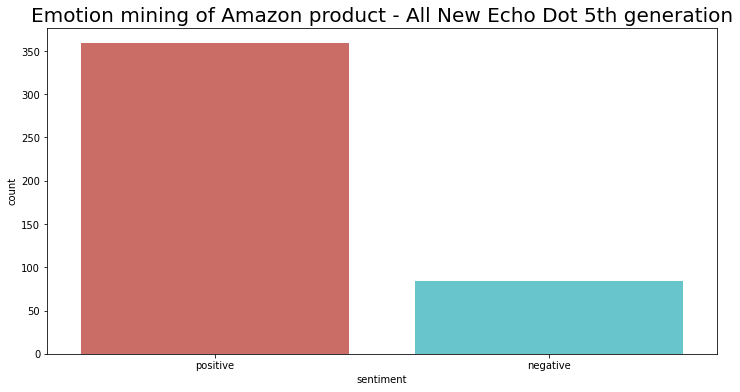

In [61]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=rev, palette='hls')
plt.title('Emotion mining of Amazon product - All New Echo Dot 5th generation',fontsize=20);

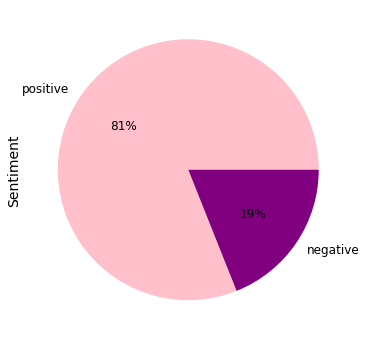

In [90]:
rev.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',  fontsize=12, figsize=(9,6), colors=["pink", "purple"])
plt.ylabel("Sentiment", size=14);

## <font color='purple'><b>Text Mining :

In [62]:
rev2 = df.copy()

In [63]:
# remove both the leading and the trailing characters
rev2=[reviews.strip() for reviews in rev2.reviews] 
# remove empty strings, because they are considered in Python as False
rev2=[reviews for reviews in rev2 if reviews] 
rev2[0:10]

['Design is really nice and fits into the decor of any room. The sound is amazing and so clear. It has directions that if already registered to your Amazon account will allow you to have the device hook to WiFi based on other products in the same WiFi network in your home without having to retype your WiFi 𝙋𝙒. Super simple and easy setup!',
 'Not happy with the speaker. Not sure if its just mine but it has a distorted sound to it and not very clear. My 3rd gen sounds much better.',
 'Going from a second generation to this was a good choice for us. Has a clearer depth of sound quality.',
 "I've planned on purchasing one with better sound, perhaps Dolby.  This one does not have premium sound.",
 'I love my All New Echo Dot 5th Gen. The quality of the sound, when playing music, is definitely richer.',
 'It’s good for its price and size. Do not expect good sound quality though, it’s muffled. Then again if be surprised rises to get decent sound from that size and for that price. Besides, I 

In [64]:
# Joining the list into one string/text
reviews_text=' '.join(rev2)
reviews_text

'Design is really nice and fits into the decor of any room. The sound is amazing and so clear. It has directions that if already registered to your Amazon account will allow you to have the device hook to WiFi based on other products in the same WiFi network in your home without having to retype your WiFi 𝙋𝙒. Super simple and easy setup! Not happy with the speaker. Not sure if its just mine but it has a distorted sound to it and not very clear. My 3rd gen sounds much better. Going from a second generation to this was a good choice for us. Has a clearer depth of sound quality. I\'ve planned on purchasing one with better sound, perhaps Dolby.  This one does not have premium sound. I love my All New Echo Dot 5th Gen. The quality of the sound, when playing music, is definitely richer. It’s good for its price and size. Do not expect good sound quality though, it’s muffled. Then again if be surprised rises to get decent sound from that size and for that price. Besides, I may be picky when it

In [65]:
import string

In [66]:
# remove punctuation
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Design is really nice and fits into the decor of any room The sound is amazing and so clear It has directions that if already registered to your Amazon account will allow you to have the device hook to WiFi based on other products in the same WiFi network in your home without having to retype your WiFi 𝙋𝙒 Super simple and easy setup Not happy with the speaker Not sure if its just mine but it has a distorted sound to it and not very clear My 3rd gen sounds much better Going from a second generation to this was a good choice for us Has a clearer depth of sound quality Ive planned on purchasing one with better sound perhaps Dolby  This one does not have premium sound I love my All New Echo Dot 5th Gen The quality of the sound when playing music is definitely richer It’s good for its price and size Do not expect good sound quality though it’s muffled Then again if be surprised rises to get decent sound from that size and for that price Besides I may be picky when it come to sound most peo

### <font color='orange'><b>Tokenization :

In [67]:
nltk.download('punkt')
nltk.download('stopwords')

from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])
len(text_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Design', 'is', 'really', 'nice', 'and', 'fits', 'into', 'the', 'decor', 'of', 'any', 'room', 'The', 'sound', 'is', 'amazing', 'and', 'so', 'clear', 'It', 'has', 'directions', 'that', 'if', 'already', 'registered', 'to', 'your', 'Amazon', 'account', 'will', 'allow', 'you', 'to', 'have', 'the', 'device', 'hook', 'to', 'WiFi', 'based', 'on', 'other', 'products', 'in', 'the', 'same', 'WiFi', 'network', 'in']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


28903

### <font color='orange'><b>Remove Stop words :

In [68]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Design', 'really', 'nice', 'fits', 'decor', 'room', 'sound', 'amazing', 'clear', 'directions', 'already', 'registered', 'Amazon', 'account', 'allow', 'device', 'hook', 'WiFi', 'based', 'products', 'WiFi', 'network', 'home', 'without', 'retype', 'WiFi', '𝙋𝙒', 'Super', 'simple', 'easy', 'setup', 'Not', 'happy', 'speaker', 'Not', 'sure', 'mine', 'distorted', 'sound', 'clear', 'My', '3rd', 'gen', 'sounds', 'much', 'better', 'Going', 'second', 'generation', 'good', 'choice', 'us', 'Has', 'clearer', 'depth', 'sound', 'quality', 'Ive', 'planned', 'purchasing', 'one', 'better', 'sound', 'perhaps', 'Dolby', 'This', 'one', 'premium', 'sound', 'love', 'All', 'New', 'Echo', 'Dot', '5th', 'Gen', 'quality', 'sound', 'playing', 'music', 'definitely', 'richer', '’', 'good', 'price', 'size', 'Do', 'expect', 'good', 'sound', 'quality', 'though', '’', 'muffled', 'Then', 'surprised', 'rises', 'get', 'decent', 'sound', 'size', 'price', 'Besides', 'may', 'picky', 'come', 'sound', 'people', 'even', 'notice

In [69]:
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['design', 'really', 'nice', 'fits', 'decor', 'room', 'sound', 'amazing', 'clear', 'directions', 'already', 'registered', 'amazon', 'account', 'allow', 'device', 'hook', 'wifi', 'based', 'products', 'wifi', 'network', 'home', 'without', 'retype', 'wifi', '𝙋𝙒', 'super', 'simple', 'easy', 'setup', 'not', 'happy', 'speaker', 'not', 'sure', 'mine', 'distorted', 'sound', 'clear', 'my', '3rd', 'gen', 'sounds', 'much', 'better', 'going', 'second', 'generation', 'good', 'choice', 'us', 'has', 'clearer', 'depth', 'sound', 'quality', 'ive', 'planned', 'purchasing', 'one', 'better', 'sound', 'perhaps', 'dolby', 'this', 'one', 'premium', 'sound', 'love', 'all', 'new', 'echo', 'dot', '5th', 'gen', 'quality', 'sound', 'playing', 'music', 'definitely', 'richer', '’', 'good', 'price', 'size', 'do', 'expect', 'good', 'sound', 'quality', 'though', '’', 'muffled', 'then', 'surprised', 'rises', 'get', 'decent', 'sound', 'size', 'price', 'besides', 'may', 'picky', 'come', 'sound', 'people', 'even', 'notice

### <font color='orange'><b>Stemming :

In [70]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['design', 'realli', 'nice', 'fit', 'decor', 'room', 'sound', 'amaz', 'clear', 'direct', 'alreadi', 'regist', 'amazon', 'account', 'allow', 'devic', 'hook', 'wifi', 'base', 'product', 'wifi', 'network', 'home', 'without', 'retyp', 'wifi', '𝙋𝙒', 'super', 'simpl', 'easi', 'setup', 'not', 'happi', 'speaker', 'not', 'sure', 'mine', 'distort', 'sound', 'clear', 'my', '3rd', 'gen', 'sound', 'much', 'better', 'go', 'second', 'gener', 'good', 'choic', 'us', 'ha', 'clearer', 'depth', 'sound', 'qualiti', 'ive', 'plan', 'purchas', 'one', 'better', 'sound', 'perhap', 'dolbi', 'thi', 'one', 'premium', 'sound', 'love', 'all', 'new', 'echo', 'dot', '5th', 'gen', 'qualiti', 'sound', 'play', 'music', 'definit', 'richer', '’', 'good', 'price', 'size', 'do', 'expect', 'good', 'sound', 'qualiti', 'though', '’', 'muffl', 'then', 'surpris', 'rise', 'get', 'decent', 'sound', 'size', 'price', 'besid', 'may', 'picki', 'come', 'sound', 'peopl', 'even', 'notic', 'differ', 'hifi', 'speaker', 'use', 'bathroom', '’

### <font color='orange'><b>Lemmatization :

In [71]:
import spacy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [75]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['design', 'really', 'nice', 'fit', 'decor', 'room', 'sound', 'amazing', 'clear', 'direction', 'already', 'register', 'amazon', 'account', 'allow', 'device', 'hook', 'wifi', 'base', 'product', 'wifi', 'network', 'home', 'without', 'retype', 'wifi', '𝙋𝙒', 'super', 'simple', 'easy', 'setup', 'not', 'happy', 'speaker', 'not', 'sure', 'mine', 'distort', 'sound', 'clear', 'my', '3rd', 'gen', 'sound', 'much', 'well', 'go', 'second', 'generation', 'good', 'choice', 'we', 'have', 'clear', 'depth', 'sound', 'quality', 'I', 've', 'plan', 'purchase', 'one', 'well', 'sound', 'perhaps', 'dolby', 'this', 'one', 'premium', 'sound', 'love', 'all', 'new', 'echo', 'dot', '5th', 'gen', 'quality', 'sound', 'play', 'music', 'definitely', 'rich', "'", 'good', 'price', 'size', 'do', 'expect', 'good', 'sound', 'quality', 'though', "'", 'muffled', 'then', 'surprised', 'rise', 'get', 'decent', 'sound', 'size', 'price', 'besides', 'may', 'picky', 'come', 'sound', 'people', 'even', 'notice', 'difference', 'hifi',

### <font color='orange'><b>Bag of Words Count Vectorizer :

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

In [76]:
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)
print(cv.vocabulary_)
print(cv.get_feature_names()[150:300])
print(reviewscv.toarray()[150:300])
print(reviewscv.toarray().shape)

{'design': 558, 'really': 1538, 'nice': 1280, 'fit': 794, 'decor': 532, 'room': 1625, 'sound': 1760, 'amazing': 147, 'clear': 408, 'direction': 582, 'already': 138, 'register': 1569, 'amazon': 149, 'account': 77, 'allow': 133, 'device': 567, 'hook': 943, 'wifi': 2118, 'base': 249, 'product': 1487, 'network': 1273, 'home': 940, 'without': 2128, 'retype': 1610, '𝙋𝙒': 2172, 'super': 1826, 'simple': 1716, 'easy': 649, 'setup': 1687, 'not': 1292, 'happy': 905, 'speaker': 1767, 'sure': 1834, 'mine': 1206, 'distort': 602, 'my': 1259, '3rd': 37, 'gen': 847, 'much': 1242, 'well': 2094, 'go': 870, 'second': 1657, 'generation': 852, 'good': 873, 'choice': 399, 'we': 2087, 'have': 911, 'depth': 553, 'quality': 1512, 've': 2053, 'plan': 1421, 'purchase': 1508, 'one': 1331, 'perhaps': 1394, 'dolby': 614, 'this': 1907, 'premium': 1462, 'love': 1151, 'all': 131, 'new': 1277, 'echo': 650, 'dot': 619, '5th': 55, 'play': 1425, 'music': 1251, 'definitely': 539, 'rich': 1617, 'price': 1472, 'size': 1724, '

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(16015, 2173)


### <font color='orange'><b>BOW CV using N-grams :

In [78]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(2,3),max_features=100,stop_words=my_stop_words)
bow_matrix_ngram=cv_ngram_range.fit_transform(rev2)
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['3rd gen', '3rd gen dot', '3rd gen echo', '3rd generation', '4th gen', '4th gen dot', '5th gen', '5th gen dot', '5th generation', 'alexa app', 'amazon music', 'aux port', 'better sound', 'black echo', 'black friday', 'buy together', 'could get', 'could loaded', 'customer support', 'dot 4th', 'dot 4th gen', 'dot 5th', 'dot 5th gen', 'dot also', 'dot eero', 'dot much', 'download speeds', 'easy set', 'easy setup', 'echo device', 'echo devices', 'echo dot', 'echo dot 5th', 'echo dot eero', 'echo dots', 'echo show', 'eero built', 'eero mesh', 'eero system', 'eero wifi', 'error message', 'even though', 'every room', 'existing echo', 'extender eero', 'fire stick', 'gen dot', 'gen dots', 'gen echo', 'gen echo dot', 'gen sound', 'generation dot', 'generation echo', 'generation echo dot', 'get echo', 'get work', 'good sound', 'great sound', 'light ring', 'listen music', 'love alexa', 'media could', 'media could loaded', 'mesh network', 'motion detection', 'motion sensing', 'much better', 'music

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### <font color='orange'><b>TFIDF Count Vectorizer using N-Grams :

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(2,3),max_features=100,stop_words=my_stop_words)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(rev2)
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['3rd gen', '3rd gen dot', '3rd gen echo', '3rd generation', '4th gen', '4th gen dot', '5th gen', '5th gen dot', '5th generation', 'alexa app', 'amazon music', 'aux port', 'better sound', 'black echo', 'black friday', 'buy together', 'could get', 'could loaded', 'customer support', 'dot 4th', 'dot 4th gen', 'dot 5th', 'dot 5th gen', 'dot also', 'dot eero', 'dot much', 'download speeds', 'easy set', 'easy setup', 'echo device', 'echo devices', 'echo dot', 'echo dot 5th', 'echo dot eero', 'echo dots', 'echo show', 'eero built', 'eero mesh', 'eero system', 'eero wifi', 'error message', 'even though', 'every room', 'existing echo', 'extender eero', 'fire stick', 'gen dot', 'gen dots', 'gen echo', 'gen echo dot', 'gen sound', 'generation dot', 'generation echo', 'generation echo dot', 'get echo', 'get work', 'good sound', 'great sound', 'light ring', 'listen music', 'love alexa', 'media could', 'media could loaded', 'mesh network', 'motion detection', 'motion sensing', 'much better', 'music

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### <font color='orange'><b>WordCloud :

In [82]:
from wordcloud import WordCloud, STOPWORDS

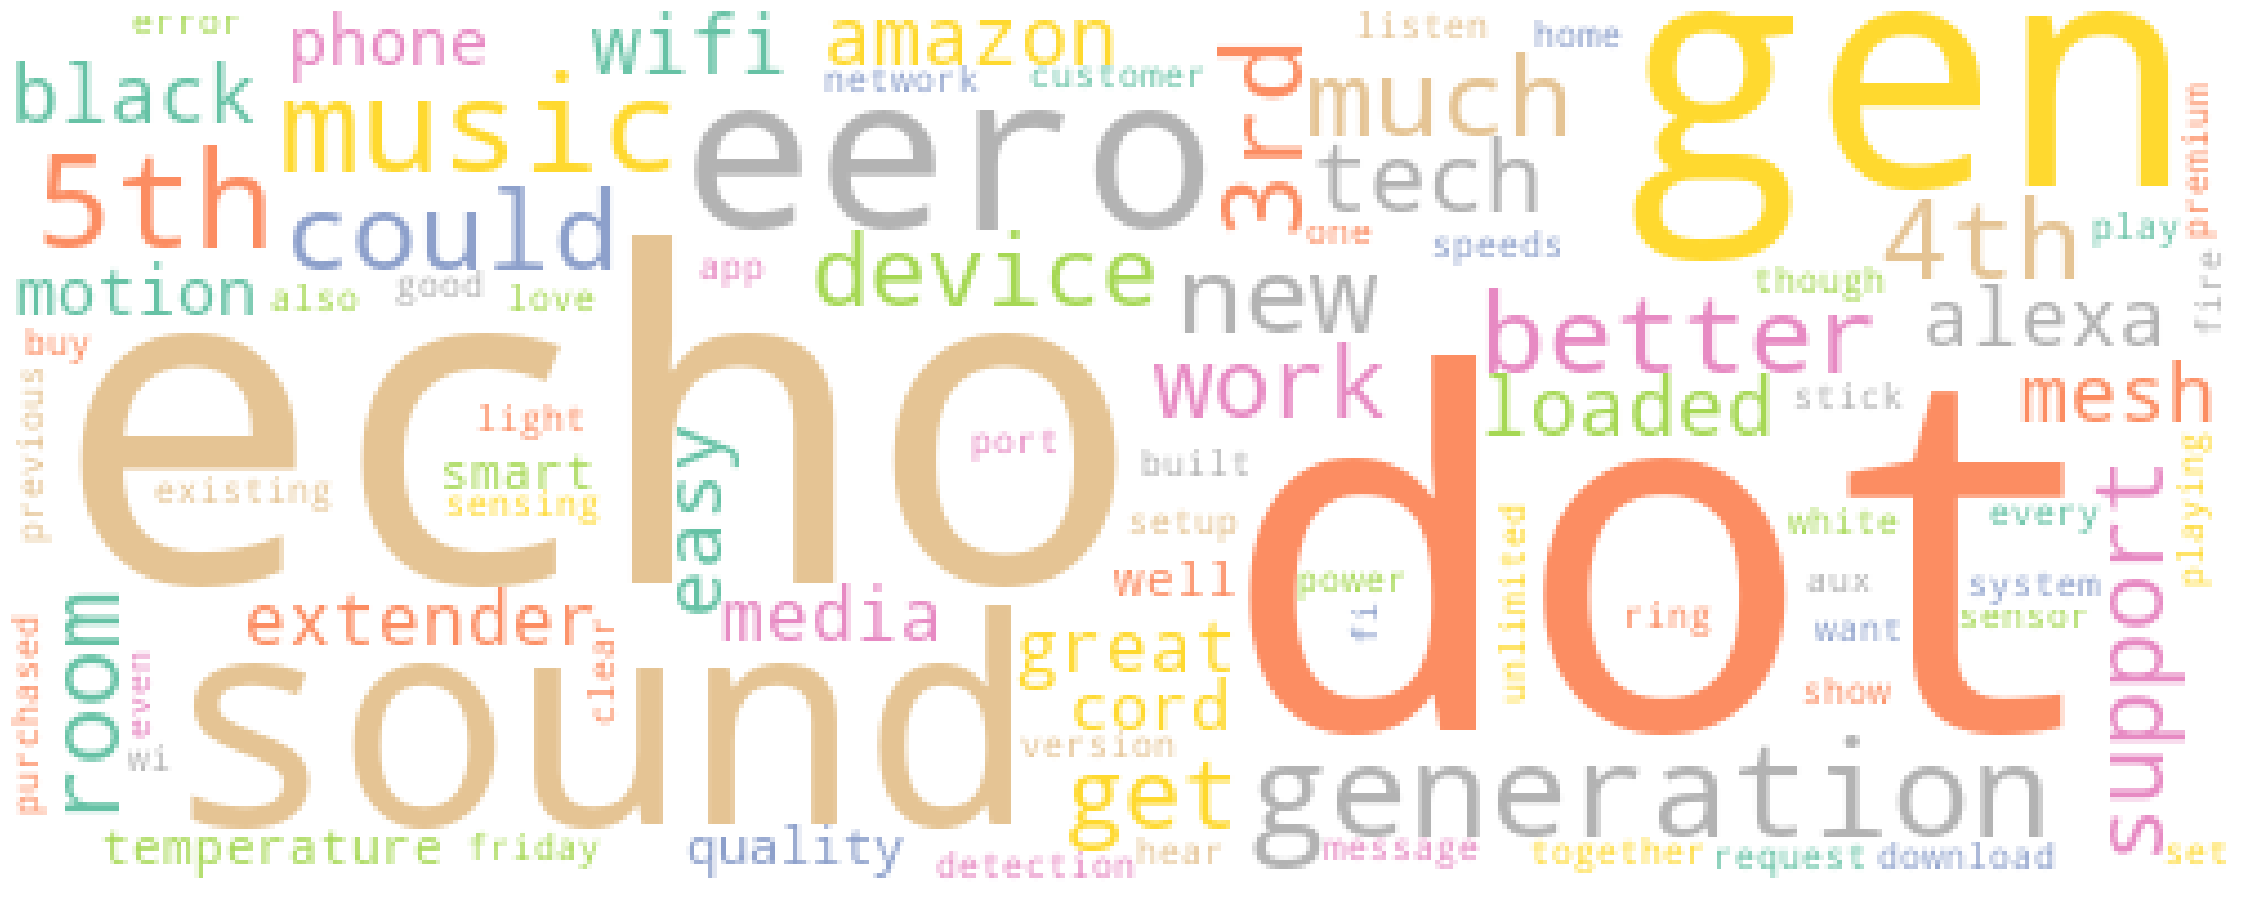

In [86]:
clean_reviews2=' '.join(tfidfv_ngram_max_features.get_feature_names())
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud
STOPWORDS.add('Pron')
wordcloud=WordCloud(width=500,height=200,background_color='white',max_words=100,
                   colormap='Set2',stopwords=my_stop_words).generate(clean_reviews2)
plot_cloud(wordcloud)